In [16]:
import pandas as pd

# Replace 'train.csv' with the path to your training dataset
train_set = pd.read_csv('train.csv')

# Display the first few rows of the dataset
train_set.head()

,uid,time,date,sender_account,receiver_account,amount,currency,payment_type,sender_bank_location,receiver_bank_location,prior_ml_flagging,is_salary_account,sender_frequent_withdrawals,customer_age,sender_account_age_in_years,is_money_laundering
0,1,08:20:18,20230101,85180496,61475110,2151.03,Euro,Debit Card,Brazil,Spain,No,No,No,20,2.000000,0
1,2,21:10:45,20230101,87092289,2393875,5339.19,United Arab Emirates Dirham,Bank Transfer,Spain,UAE,No,Yes,No,43,12.863832,0
2,3,13:40:20,20230101,44050396,99363243,11309.87,Brazilian real,Debit Card,Spain,Brazil,No,Yes,No,39,11.311818,0
3,4,18:42:35,20230101,44050396,90332196,27571.51,Euro,Credit Card,Spain,France,No,Yes,No,39,11.311818,0
4,5,18:44:18,20230101,44050396,41200849,405.76,Euro,SEPA,Spain,Italy,No,Yes,No,39,11.311818,0


In [17]:
X = train_set.drop(columns=['is_money_laundering'])
y = train_set['is_money_laundering']

In [18]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (108128, 15)
X_test shape: (27033, 15)
y_train shape: (108128,)
y_test shape: (27033,)


Missing values in X:
 uid                            0
time                           0
date                           0
sender_account                 0
receiver_account               0
amount                         0
currency                       0
payment_type                   0
sender_bank_location           0
receiver_bank_location         0
prior_ml_flagging              0
is_salary_account              0
sender_frequent_withdrawals    0
customer_age                   0
sender_account_age_in_years    0
dtype: int64


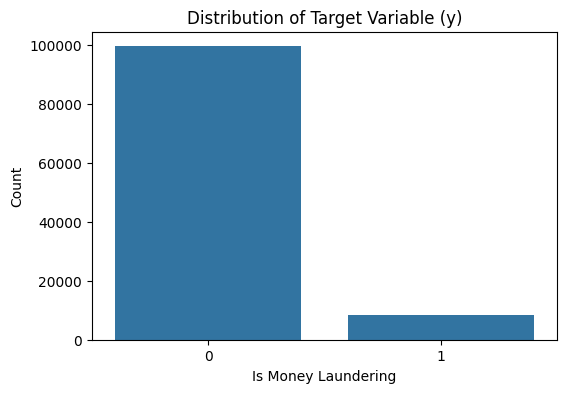

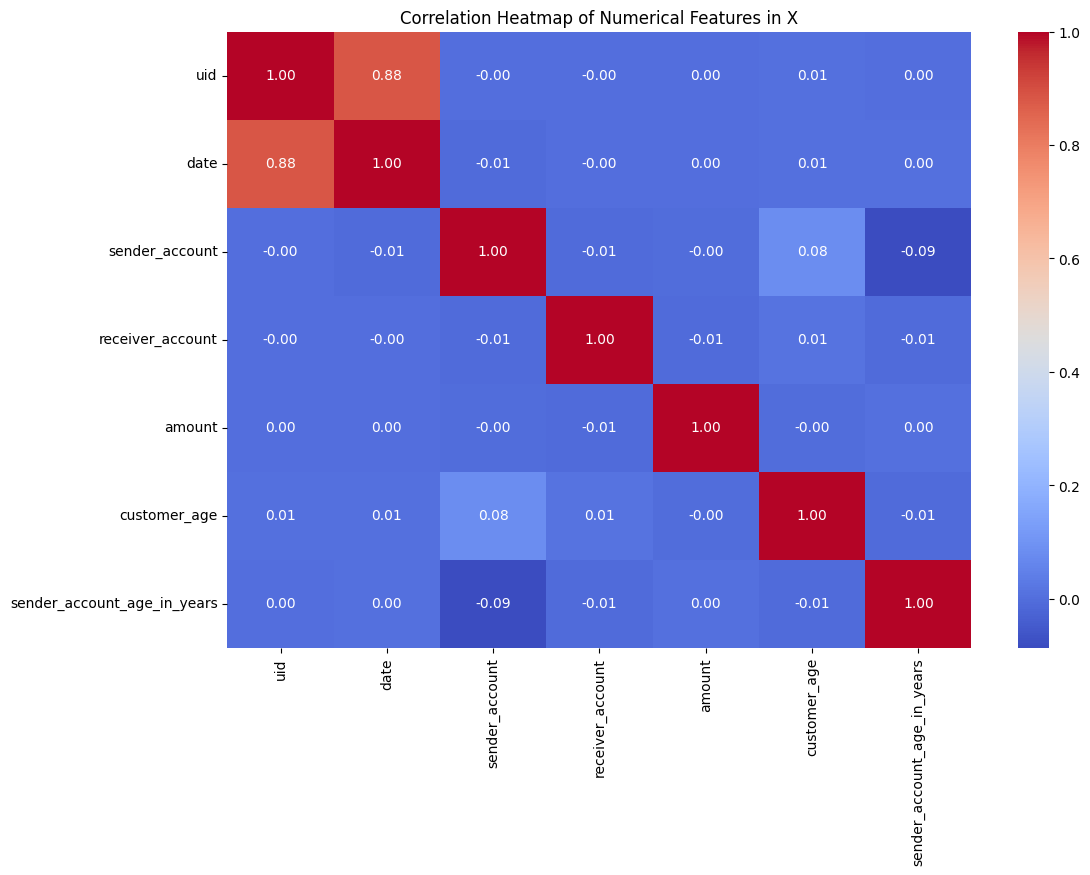

Co-occurrence of 'prior_ml_flagging' and 'is_money_laundering':
 is_money_laundering         0         1
prior_ml_flagging                      
No                   0.924818  0.075182
Yes                  0.542962  0.457038


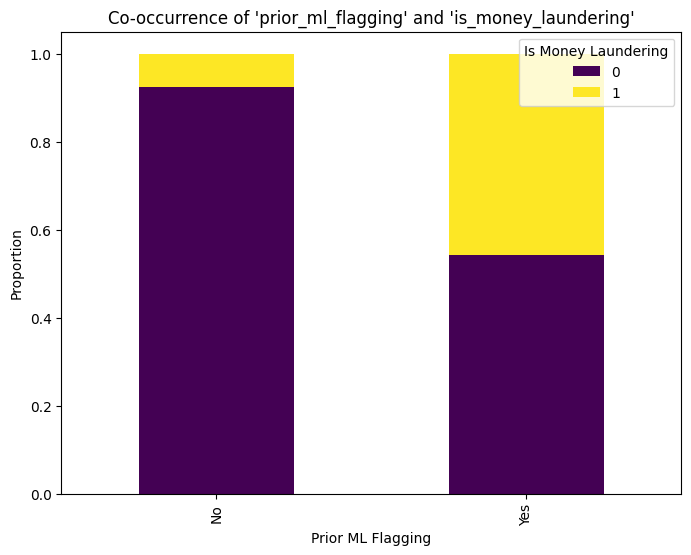

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values in X
missing_values = X.isnull().sum()
print("Missing values in X:\n", missing_values)

# Distribution of the target variable y
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title("Distribution of Target Variable (y)")
plt.xlabel("Is Money Laundering")
plt.ylabel("Count")
plt.show()

# Correlation heatmap for numerical features in X
plt.figure(figsize=(12, 8))
numerical_features = X.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features in X")
plt.show()

# Co-occurrence of 'prior_ml_flagging' and 'is_money_laundering'
co_occurrence = pd.crosstab(X['prior_ml_flagging'], y, normalize='index')
print("Co-occurrence of 'prior_ml_flagging' and 'is_money_laundering':\n", co_occurrence)

# Visualize co-occurrence
co_occurrence.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title("Co-occurrence of 'prior_ml_flagging' and 'is_money_laundering'")
plt.xlabel("Prior ML Flagging")
plt.ylabel("Proportion")
plt.legend(title="Is Money Laundering")
plt.show()

In [20]:
from scipy.stats import pointbiserialr

# Calculate point biserial correlation for continuous variables
continuous_columns = numerical_features.columns
correlations = {}
for col in continuous_columns:
    correlation, _ = pointbiserialr(X[col], y)
    correlations[col] = correlation

# Display correlations
print("Point Biserial Correlation with Target Variable (y):")
for col, corr in correlations.items():
    print(f"{col}: {corr:.4f}")

Point Biserial Correlation with Target Variable (y):
uid: 0.0640
date: 0.0979
sender_account: -0.0077
receiver_account: 0.0088
amount: 0.0335
customer_age: 0.0117
sender_account_age_in_years: -0.0132


In [21]:
X

,uid,time,date,sender_account,receiver_account,amount,currency,payment_type,sender_bank_location,receiver_bank_location,prior_ml_flagging,is_salary_account,sender_frequent_withdrawals,customer_age,sender_account_age_in_years
107556,107557,09:10:33,20240502,8860286,12428496,7979.18,Swedish Krona,Debit Card,Spain,Sweden,Yes,Yes,No,42,7.662866
59678,59679,20:11:12,20230926,76696582,77148525,4792.34,Euro,Credit Card,Spain,Portugal,No,No,No,18,6.770719
57881,57882,14:45:41,20230918,91250388,82975723,6776.92,Euro,SEPA,France,Spain,No,Yes,No,88,9.428842
94645,94646,22:03:31,20240307,80194687,54826497,8420.65,Euro,SEPA,France,Spain,No,No,No,42,1.863014
86698,86699,09:21:36,20240129,41493312,8894129,6929.04,Euro,SEPA,Spain,Italy,No,Yes,No,42,5.824956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,110269,16:09:00,20240515,12313970,13503881,15285.03,Euro,SEPA,Spain,Portugal,No,No,No,39,10.351049
119879,119880,21:53:50,20240628,80859255,6365032,17636.47,Euro,Debit Card,Spain,Brazil,No,Yes,No,19,3.276115
103694,103695,23:41:05,20240414,45615112,84174478,1700.72,Euro,Credit Card,Italy,Isle of Man,No,Yes,No,52,1.997260
131932,131933,17:58:13,20240817,75258141,91997688,10556.39,Euro,SEPA,Spain,Spain,No,Yes,No,64,1.797260


In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier

categorical_columns = ['currency', 'payment_type', 'sender_bank_location', 'receiver_bank_location', 
                       'prior_ml_flagging', 'is_salary_account', 'sender_frequent_withdrawals']
numerical_columns = ['amount', 'customer_age', 'sender_account_age_in_years']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(random_state=42))
])

# Fit the pipeline to the data
pipeline.fit(X, y)

# Example: Predict on the same data
predictions = pipeline.predict(X_test)
print(predictions)

[0 0 0 ... 0 0 0]


F1 Score: 0.0205
Precision: 0.7857
Recall: 0.0104


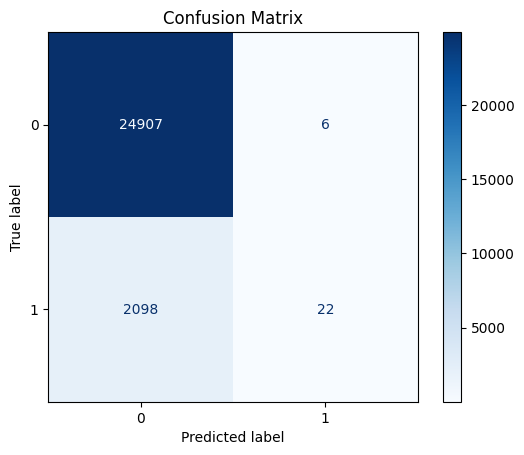

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

accuracy = pipeline.score(X_test, y_test)
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.named_steps['classifier'].classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
